<ipython-input-17-71cc8cd8b76a>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv', parse_dates=['Month'], dayfirst=True)


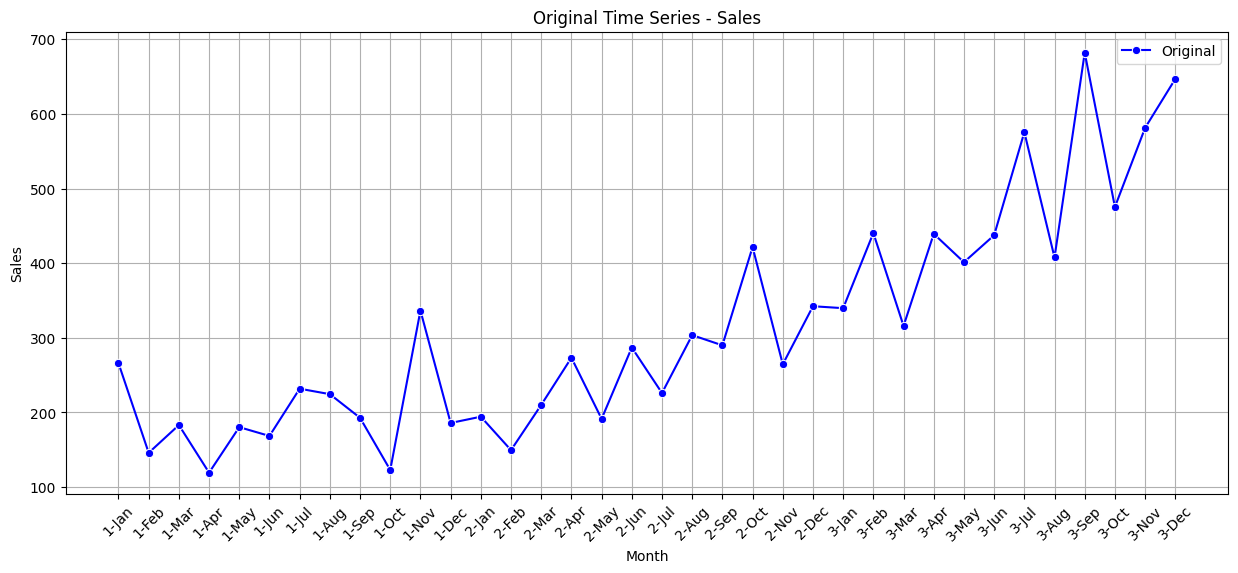

Original Series Stationarity Test:
ADF Statistic: 3.060142083641181
p-value: 1.0
Critical Values: {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}
The series is non-stationary (fail to reject null hypothesis).

After Differencing Stationarity Test:
ADF Statistic: -7.249074055553854
p-value: 1.7998574141687034e-10
Critical Values: {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}
The series is stationary (reject null hypothesis).


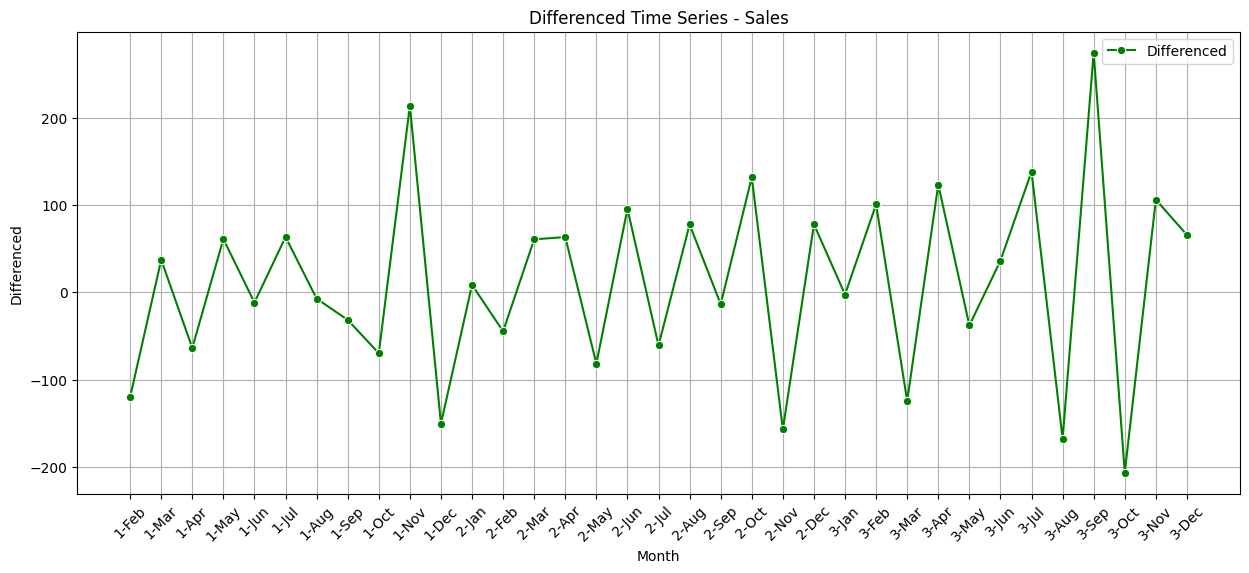

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Load the CSV file (replace 'your_file.csv' with the actual path)
df = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv', parse_dates=['Month'], dayfirst=True)

# Augmented Dickey-Fuller Test Function
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] < 0.05:
        print("The series is stationary (reject null hypothesis).")
    else:
        print("The series is non-stationary (fail to reject null hypothesis).")

# Plot Original Time Series
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='Sales', data=df, marker='o', label='Original', color='blue')
plt.title('Original Time Series - Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# ADF Test on Original Series
print("Original Series Stationarity Test:")
adf_test(df['Sales'])

# Handle Non-Stationary Data
if adfuller(df['Sales'])[1] > 0.05:

    df['Differenced'] = df['Sales'].diff().dropna()
    print("\nAfter Differencing Stationarity Test:")
    adf_test(df['Differenced'])

    # Plot Differenced Time Series
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='Month', y='Differenced', data=df.iloc[1:], marker='o', label='Differenced', color='green')
    plt.title('Differenced Time Series - Sales')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
